# Salary Prediction using Machine Learning

The Model involves prediction of Salary based on Years of Experience.
The Model is created by using:
1. Stochastic Gradient Descent method 
2. Linear Regression method

# Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [46]:
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Data Collection

In [3]:
salary = pd.read_csv('Salary_Data.csv')

In [4]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x = salary['YearsExperience'].values.reshape(-1,1)
y = salary['Salary'].values.reshape(-1,1)

# Analyzing The Data

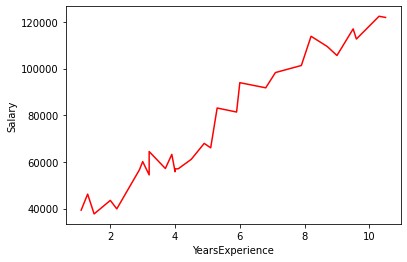

In [8]:
plt.plot(x,y,color='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

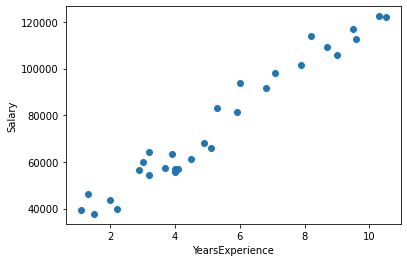

In [7]:
plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

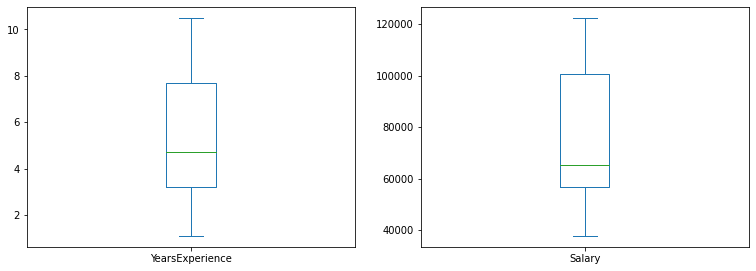

In [11]:
salary.plot(kind= 'box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(20,15))
plt.show()

In [13]:
salary.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

<AxesSubplot:>

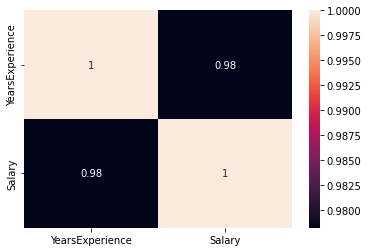

In [15]:
sns.heatmap(salary.corr(),annot=True)

# Data Modelling using Gradient Descent Method

In this process, we will do following steps:
1. Define a function for gradient descent, with two arguments 
2. The function will use the iterative method with 200 iterations and learning rate = 0.01
3. Applying mathematical formulae of gradient descent method in the loop
4. minimzing the cost such that predictive value will be nearest to testing value
5. Find the Accuarcy using R2_score
6. Plot between predicted and target values

In [23]:
def gradient_decent(x,y):
    m_curr = b_curr = 0
    itr = 200
    n = len(x)
    lr = 0.01
    #plt.plot(x,y)
    cost=[]
    
    for i in range(itr):
        y_pred = m_curr*x + b_curr
        cost_temp = (1/n)*sum([val**2 for val in (y-y_pred)])
        cost.append(cost_temp)
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr - lr*md
        b_curr = b_curr - lr*bd
        print("m: {} , b: {} , cost: {} , iteration: {}".format(m_curr,b_curr,cost_temp,i))
        #plt.plot(x,y_pred)
        
    plt.plot(x,y)
    plt.plot(x,y_pred)
    r2 = r2_score(y,y_pred)
    print("Accuracy: ",r2)
    print("R: ", math.sqrt(r2))
    return r2


Now, we will use the defined function on our dataset:

m: [9547.974] , b: [1520.06] , cost: [6.50295527e+09] , iteration: 0
m: [12056.69235267] , b: [1995.0874296] , cost: [5.95473385e+08] , iteration: 1
m: [12707.81767044] , b: [2194.02117366] , cost: [1.83107993e+08] , iteration: 2
m: [12868.77569178] , b: [2319.78332575] , cost: [1.53439943e+08] , iteration: 3
m: [12900.42596039] , b: [2425.92576238] , cost: [1.5043161e+08] , iteration: 4
m: [12897.99808257] , b: [2526.58198175] , cost: [1.49287859e+08] , iteration: 5
m: [12886.62268517] , b: [2625.4830792] , cost: [1.48281849e+08] , iteration: 6
m: [12872.93147573] , b: [2723.61498028] , cost: [1.47293253e+08] , iteration: 7
m: [12858.67435081] , b: [2821.23916252] , cost: [1.46313625e+08] , iteration: 8
m: [12844.31291177] , b: [2918.42591825] , cost: [1.45342311e+08] , iteration: 9
m: [12829.96878341] , b: [3015.19508113] , cost: [1.44379201e+08] , iteration: 10
m: [12815.67387247] , b: [3111.55316346] , cost: [1.43424223e+08] , iteration: 11
m: [12801.43641017] , b: [3207.50315667] 

m: [11508.22893757] , b: [11922.08776996] , cost: [73214101.07054317] , iteration: 127
m: [11499.52149919] , b: [11980.76488613] , cost: [72859973.1215189] , iteration: 128
m: [11490.85089737] , b: [12039.19377043] , cost: [72508835.09113996] , iteration: 129
m: [11482.21697629] , b: [12097.37547299] , cost: [72160661.73538496] , iteration: 130
m: [11473.61958077] , b: [12155.31103952] , cost: [71815428.02336906] , iteration: 131
m: [11465.05855629] , b: [12213.00151128] , cost: [71473109.13554426] , iteration: 132
m: [11456.53374898] , b: [12270.44792514] , cost: [71133680.46191506] , iteration: 133
m: [11448.04500562] , b: [12327.65131358] , cost: [70797117.60026953] , iteration: 134
m: [11439.59217365] , b: [12384.61270471] , cost: [70463396.35442452] , iteration: 135
m: [11431.17510114] , b: [12441.33312229] , cost: [70132492.73248649] , iteration: 136
m: [11422.79363682] , b: [12497.81358577] , cost: [69804382.9451265] , iteration: 137
m: [11414.44763005] , b: [12554.05511025] , c

0.9256023208331805

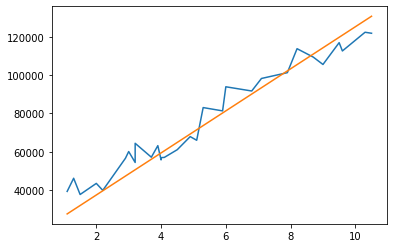

In [24]:
gradient_decent(x,y)

### From the above model, Accuracy = 0.9256

# Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split

In [27]:
x_test,x_train,y_test,y_train = train_test_split(x,y)

# Data Modelling using Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.coef_

array([[9773.0447306]])

In [32]:
lr.intercept_

array([22562.17083192])

In [33]:
y_pred = lr.predict(x_test)

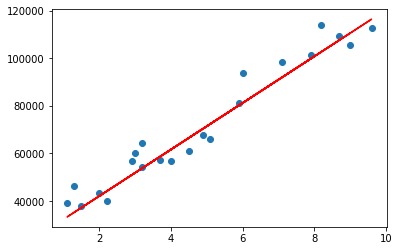

In [37]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.show()

# Accuracy Finding for Linear Regression

In [38]:
r2 = r2_score(y_test,y_pred)

In [39]:
r2

0.93904361183072

In [40]:
r = math.sqrt(r2)

In [41]:
r

0.9690426264260619

### From the above model, Accuracy = 0.9390

# Conclusion

#### The Accuracy of Linear Regression is greater than Accuracy of Gradient Descent Method. Thus, the accepted model will be of Linear Regression. Now we will analyze the salary for some new inputs.

# Making a Predictive System 

In [42]:
input_data = np.asarray(5.3) #years of experience = 5.3 years

In [44]:
input_data_reshaped = input_data.reshape(1,-1)

In [48]:
prediction = lr.predict(input_data_reshaped)
print(prediction)

[[74359.3079041]]


The Salary for employee with 5.3 years of experience is Rs.74360